**Note**: Feel free to use CoPilot/ChatGPT for editing/plotting your findings

In [ ]:
!pip install git+https://github.com/Mayukhdeb/comp-neuro.git

In [ ]:
import torch.nn as nn
import torch
from compneuro.training import train_model
from compneuro.mlp import build_mlp_model, visualize_mlp
from compneuro.utils.video import show_video

save_dir = "results/vis/single_neuron"

In [ ]:
model = build_mlp_model(
    size_sequence=[1, 5, 1],
)
visualize_mlp(model=model, fig_width = 5, fig_height=5)

In [ ]:
model = build_mlp_model(
    ## Try training a super wide but shallow network
    ## then try training a super deep (~5 layers) but narrow network
    size_sequence=[1, 1], ## TASK: vary this and see it's effect on the test loss.
    bias = True,
    activation=nn.ReLU()
)

In [ ]:
test_loss = train_model(
    model=model,
    dataset_name="noisy_line", ## TASK: try out different datasets like
    noisy_data=True,
    dataset_noise=0.2,  
    learning_rate=0.03,  ## TASK: vary this and see it's effect on the test loss
    batch_size=32,
    num_epochs=100,
    num_data_points=50,
    test_data_fraction=0.3,
    visualize_every_nth_step=1,
    video_frames_folder=save_dir,
    save_video_as="training.mp4",
    device = "cuda" if torch.cuda.is_available() else "cpu"
)
show_video(filename="training.mp4", width = 600)

In [ ]:
all_dataset_names = [
    "sine_wave",
    "line",
    "line_through_zero",
    "zigzag_line",
    "x_square",
    "wedge",
    "elbow",
    "sin_relu",
    "noisy_line",
]

# After playing around with the models, try to find the answers to the following questions:

1. How does depth and width of a network affect it’s performance? (plot/show results on 2 datasets and plot test loss v/s depth and test loss v/s width)
2. What happens when the learning rate is too high/low in a model? Log your results and write a blurb about what you find.

Submit the pdf version of your notebook in Canvas by clicking on "File" at the top right and then clicking on "Print"


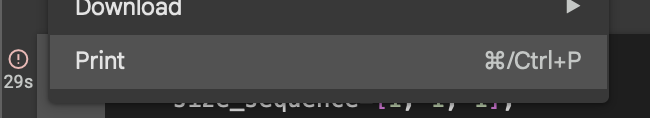